# End-End Electronics Sales:  By Thabo Pilusa



**Chapter 1: Creating customers and sales database using SQL**

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to SQLite database (creates the file sales.db)
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

1.1 Create the table for customers, products and sales



In [2]:
#Table for Customers:

cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    region TEXT NOT NULL
);
''')
#Table for Products:
cursor.execute('''
CREATE TABLE IF NOT EXISTS Products (
    product_id INTEGER PRIMARY KEY AUTOINCREMENT,
    product_name TEXT NOT NULL,
    category TEXT NOT NULL,
    price REAL NOT NULL
);
''')


# Table for Sales:
cursor.execute('''
CREATE TABLE IF NOT EXISTS Sales (
    sale_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    product_id INTEGER NOT NULL,
    sale_date TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    total_price REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id),
    FOREIGN KEY (product_id) REFERENCES Products(product_id)
);
''')





1.2. **Fill the tables**


1.2.1 Customers:

In [3]:
customers = [
    ('Thabo Pilusa', 'pilusajustin@gmail.com', 'Johannesburg'),
    ('Katlego Mogale', 'MogaleKatty@gmail.com', 'Polokwane'),
    ('Malesa Tshepiso', 'tshepisworld@gmail.com', 'Burgersfort'),
    ('Lebo Mabu', 'leboomcool99@gmail.com', 'Bloemfontein'),
    ('Charlie Manamela', 'charlz33@gmail.com', 'Pretoria'),
    ('David Legae', 'davidlegae@gmail.com', 'Burgersfort'),
    ('Watson Masemola', 'watsonmasemol@gmail.com', 'Pretoria'),
    ('Lebo Adams', 'leboadams75@gmail.com', 'Pretoria'),
    ('Nare Mmola Hall', 'mmolatlou@gmail.com', 'Cape Town'),
    ('Henry Lehube', 'lehubehh@gmail.com', 'Polokwane'),
    ('Charles Lewis', 'chalielewisham@gmail.com', 'East'),
    ('Jack Harris', 'jackharris33@gmail.com', 'Polokwane'),
    ('Katlego Ntube', 'katlegon4@gmail.com', 'Burgerafort'),
    ('Liam Scott', 'liamscott97@gmail.com', 'Cape Town'),
    ('Mia Turner', 'turnedturner33@gmail.com', 'East London'),
    ('Lebogang Mogorosi', 'lebzalady77@gmail.com', 'Johannesburg'),
    ('Mamelo Legodi ', 'Mamafire79@gmail.com.com', 'Bloemfontein'),
    ('Josephine Maila', 'Josila@gmail.com', 'Bloemfontein'),
    ('Justin Mogale', 'Justybaybay@gmail.com', 'East London'),
    ('Mmabatho Tau ', 'peacefulion@gmail.com', 'Cape Town'),
    ('Samkelo Ntube', 'youngsamke@gmail.com', 'Johannesburg'),
    ('Siphosethu Phakade', 'giftedsipho@gmail.com', 'Bloemfontein'),
    ('Nkosi Maila', 'nkosimails@gmail.com', 'Johannesburg'),
    ('Dineo Phala', 'gifts4gifts@gmail.com', 'Johannesburg'),
    ('Daniel Legodi', 'Dannyboy233@gmail.com', 'Johannesburg'),
    ('Taka Maredi', 'mareditakzen@gmail.com', 'Johannesburg'),
    ('Selaleng Goitsemang ', 'selala@gmail.com', 'Bloemfontein'),
    ('Zachary Diaz', 'zacharydiaz44@example.com', 'Johannesburg')
]

cursor.executemany("INSERT INTO Customers (name, email, region) VALUES (?, ?, ?);", customers)

1.2.2. Products:

In [4]:
products = [
    ('Laptop', 'Electronics', 999.99),
    ('Smartphone', 'Electronics', 699.99),
    ('Tablet', 'Electronics', 499.99),
    ('Headphones', 'Accessories', 149.99),
    ('Smartwatch', 'Accessories', 199.99)
]

cursor.executemany("INSERT INTO Products (product_name, category, price) VALUES (?, ?, ?);", products)

1.2.3. Sales:

In [18]:
sales = [
    (1, 1, '2024-07-01', 2, 1999.98),
    (2, 2, '2024-07-02', 1, 699.99),
    (3, 3, '2024-07-03', 3, 1499.97),
    (4, 4, '2024-07-04', 4, 599.96),
    (5, 5, '2024-07-05', 1, 199.99),
    (6, 2, '2024-07-06', 2, 1399.98),
    (7, 1, '2024-07-07', 1, 999.99),
    (8, 3, '2024-07-08', 2, 999.98)
]

cursor.executemany("INSERT INTO Sales (customer_id, product_id, sale_date, quantity, total_price) VALUES (?, ?, ?, ?, ?);", sales)

1.3. **Visualising some data yaay:**

1.3.1 View the customers table:

In [6]:
df_customers = pd.read_sql_query("SELECT * FROM Customers;", conn)
df_customers

,customer_id,name,email,region
0,1,Thabo Pilusa,pilusajustin@gmail.com,Johannesburg
1,2,Katlego Mogale,MogaleKatty@gmail.com,Polokwane
2,3,Malesa Tshepiso,tshepisworld@gmail.com,Burgersfort
3,4,Lebo Mabu,leboomcool99@gmail.com,Bloemfontein
4,5,Charlie Manamela,charlz33@gmail.com,Pretoria
5,6,David Legae,davidlegae@gmail.com,Burgersfort
6,7,Watson Masemola,watsonmasemol@gmail.com,Pretoria
7,8,Lebo Adams,leboadams75@gmail.com,Pretoria
8,9,Nare Mmola Hall,mmolatlou@gmail.com,Cape Town
9,10,Henry Lehube,lehubehh@gmail.com,Polokwane


1.3.2. Viewing Sales by Product:

<ipython-input-7-5bed1b5609ea>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_product_sales["product_name"], y=df_product_sales["total_sold"], palette="viridis")


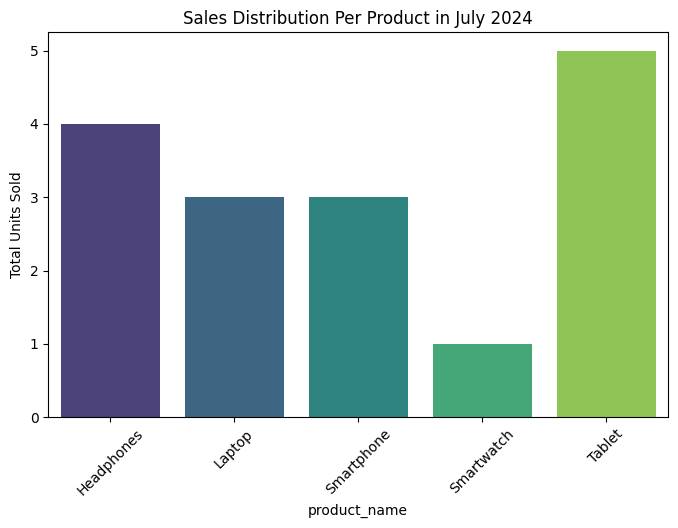

In [7]:
df_product_sales = pd.read_sql_query("""
    SELECT Products.product_name, SUM(Sales.quantity) AS total_sold
    FROM Sales
    JOIN Products ON Sales.product_id = Products.product_id
    GROUP BY Products.product_name;
""", conn)

plt.figure(figsize=(8, 5))
sns.barplot(x=df_product_sales["product_name"], y=df_product_sales["total_sold"], palette="viridis")
plt.ylabel("Total Units Sold")
plt.title("Sales Distribution Per Product in July 2024")
plt.xticks(rotation=45)
plt.show()

1.3.3. Viewing Sales by Region:

<ipython-input-8-570b8495d72d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sales_region["region"], y=df_sales_region["total_revenue"], palette="coolwarm")


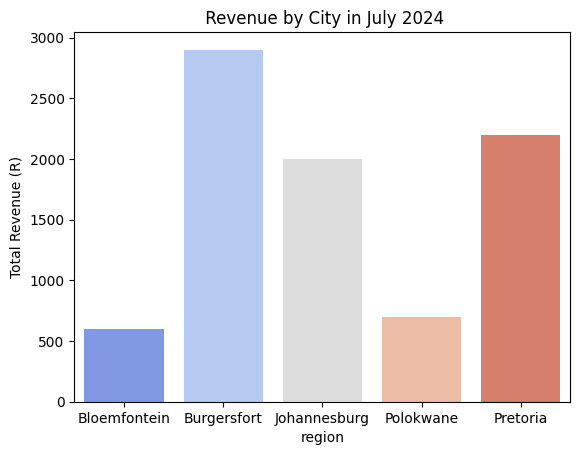

In [8]:
df_sales_region = pd.read_sql_query("""
    SELECT Customers.region, SUM(Sales.total_price) AS total_revenue
    FROM Sales
    JOIN Customers ON Sales.customer_id = Customers.customer_id
    GROUP BY Customers.region;
""", conn)
sns.barplot(x=df_sales_region["region"], y=df_sales_region["total_revenue"], palette="coolwarm")
plt.ylabel("Total Revenue (R)")
plt.title(" Revenue by City in July 2024")
plt.show()

**Chapter 2: Machine Learning**

**2.1: Exploratory Data Analysis**

In [32]:

# Load all data into the pandas dataFrames:
customers = pd.read_sql_query("SELECT * FROM Customers", conn)
products = pd.read_sql_query("SELECT * FROM Products", conn)
sales = pd.read_sql_query("SELECT * FROM Sales", conn)

# Merge all data into a single dataFrame for analysing:(check the merged results below)
df = pd.merge(sales, customers, on='customer_id')
df = pd.merge(df, products, on='product_id')
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['unit_price'] = df['total_price'] / df['quantity']
df['month'] = df['sale_date'].dt.month
df['day'] = df['sale_date'].dt.day

# Exploratory Data Analysis for the month of July:
print("Total Revenue for July:", df['total_price'].sum())
print("Average Transaction Value:", df['total_price'].mean())
print("Total Units Sold in July:", df['quantity'].sum())
print("\nTop Selling Products:")
print(df.groupby('product_name')['quantity'].sum().sort_values(ascending=False))
print("\nRevenue by Region:")
print(df.groupby('region')['total_price'].sum().sort_values(ascending=False))
df.head()

Total Revenue for July: 16799.68
Average Transaction Value: 1049.98
Total Units Sold in July: 32

Top Selling Products:
product_name
Tablet        10
Headphones     8
Laptop         6
Smartphone     6
Smartwatch     2
Name: quantity, dtype: int64

Revenue by Region:
region
Burgersfort     5799.90
Pretoria        4399.92
Johannesburg    3999.96
Polokwane       1399.98
Bloemfontein    1199.92
Name: total_price, dtype: float64


,sale_id,customer_id,product_id,sale_date,quantity,total_price,name,email,region,product_name,category,price,unit_price,month,day
0,1,1,1,2024-07-01,2,1999.98,Thabo Pilusa,pilusajustin@gmail.com,Johannesburg,Laptop,Electronics,999.99,999.99,7,1
1,2,2,2,2024-07-02,1,699.99,Katlego Mogale,MogaleKatty@gmail.com,Polokwane,Smartphone,Electronics,699.99,699.99,7,2
2,3,3,3,2024-07-03,3,1499.97,Malesa Tshepiso,tshepisworld@gmail.com,Burgersfort,Tablet,Electronics,499.99,499.99,7,3
3,4,4,4,2024-07-04,4,599.96,Lebo Mabu,leboomcool99@gmail.com,Bloemfontein,Headphones,Accessories,149.99,149.99,7,4
4,5,5,5,2024-07-05,1,199.99,Charlie Manamela,charlz33@gmail.com,Pretoria,Smartwatch,Accessories,199.99,199.99,7,5


**2.2. Sales Forecasting with Time Series Analysis**

- Autoregressive integrated moving average (ARIMA) models predict future values based on past values. ARIMA makes use of lagged moving averages to smooth time series data. They are widely used in technical analysis to forecast future security prices.

- Prophet is a model for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [ ]:
!pip install Prophet #recommend installing prophet instead of fbprophet

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:

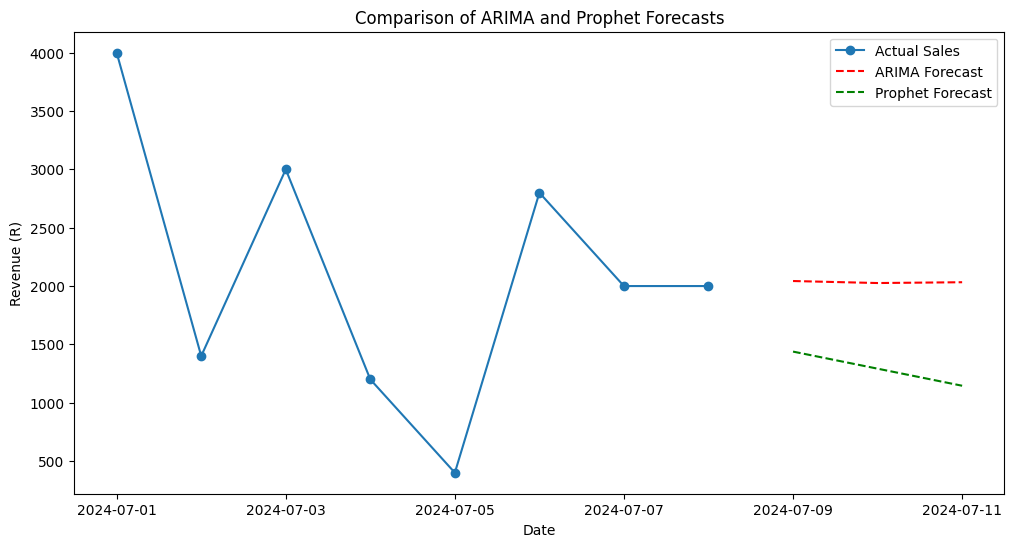

ARIMA Performance:
MAE: 710.73, MSE: 1069693.47, RMSE: 1034.26

Prophet Performance:
MAE: 917.30, MSE: 1025610.40, RMSE: 1012.72


In [34]:

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Prepare the Time Series, the data is aggregated by date (sale_date) to compute total sales revenue (total_price).
daily_sales = df.groupby('sale_date').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).reset_index()

# Rename columns for Prophet
daily_sales.rename(columns={'sale_date': 'ds', 'total_price': 'y'}, inplace=True)

# Fill missing dates with 0 (assuming no sales)
date_range = pd.date_range(start=daily_sales['ds'].min(), end=daily_sales['ds'].max())
daily_sales = daily_sales.set_index('ds').reindex(date_range, fill_value=0).reset_index()
daily_sales.rename(columns={'index': 'ds'}, inplace=True)

# Set date as index for ARIMA
daily_sales_arima = daily_sales.set_index('ds')

# Fit data to the ARIMA Model
try:
    model_arima = ARIMA(daily_sales_arima['y'], order=(1, 0, 0))  # Simple ARIMA(1,0,0)
    model_fit_arima = model_arima.fit()
    forecast_arima = model_fit_arima.forecast(steps=3)  # Forecast next 3 days
except Exception as e:
    print("ARIMA modeling failed:", e)

#Fit data to the Prophet Model
model_prophet = Prophet()  # Default settings
model_prophet.fit(daily_sales)

# Create a DataFrame for future dates
future = model_prophet.make_future_dataframe(periods=3)  # Forecast next 3 days
forecast_prophet = model_prophet.predict(future)

# Extract Prophet's forecasted values
forecast_prophet_values = forecast_prophet[['ds', 'yhat']].tail(3)  # Last 3 days of forecast

#Combine Results and Plot
plt.figure(figsize=(12, 6))

# Actual Sales
plt.plot(daily_sales['ds'], daily_sales['y'], label='Actual Sales', marker='o')

# ARIMA Forecast
arima_forecast_dates = pd.date_range(start=daily_sales['ds'].max() + pd.Timedelta(days=1), periods=3)
plt.plot(arima_forecast_dates, forecast_arima, label='ARIMA Forecast', color='red', linestyle='--')

# Prophet Forecast
plt.plot(forecast_prophet_values['ds'], forecast_prophet_values['yhat'],
         label='Prophet Forecast', color='green', linestyle='--')

plt.title('Comparison of ARIMA and Prophet Forecasts')
plt.xlabel('Date')
plt.ylabel('Revenue (R)')
plt.legend()
plt.show()

#  Calculate Performance Metrics


# ARIMA Performance on Training Data
train_actual = daily_sales_arima['y']
train_pred_arima = model_fit_arima.fittedvalues  # In-sample predictions from ARIMA
mae_arima = mean_absolute_error(train_actual, train_pred_arima)
mse_arima = mean_squared_error(train_actual, train_pred_arima)
rmse_arima = mse_arima ** 0.5

# Prophet Performance on Training Data
train_pred_prophet = forecast_prophet.loc[forecast_prophet['ds'].isin(daily_sales['ds']), 'yhat']
mae_prophet = mean_absolute_error(daily_sales['y'], train_pred_prophet)
mse_prophet = mean_squared_error(daily_sales['y'], train_pred_prophet)
rmse_prophet = mse_prophet ** 0.5

# Print Performance Metrics
print("ARIMA Performance:")
print(f"MAE: {mae_arima:.2f}, MSE: {mse_arima:.2f}, RMSE: {rmse_arima:.2f}")

print("\nProphet Performance:")
print(f"MAE: {mae_prophet:.2f}, MSE: {mse_prophet:.2f}, RMSE: {rmse_prophet:.2f}")

**2.3. Customer Segmentation: Clustering**

- K-means clustering is an algorithm used for data clustering, which groups unlabeled data points into groups or clusters.
- PCA (Principal Component Analysis) : Reduces the high-dimensional feature space to 2 dimensions while preserving as much variance as possible.



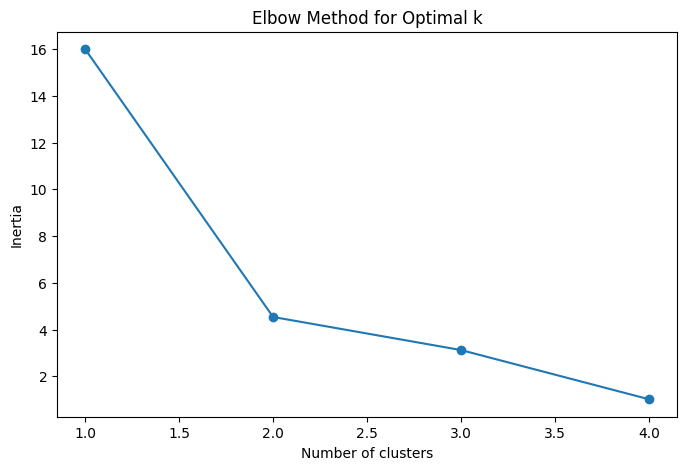

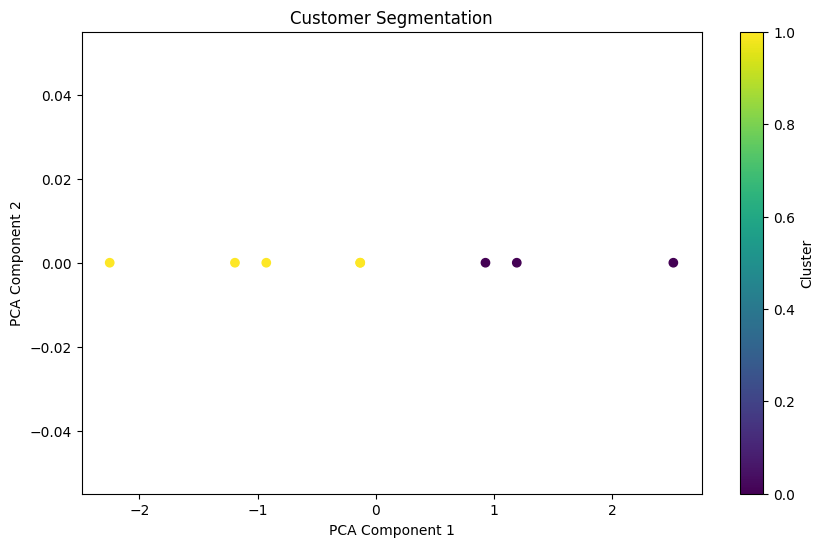

Cluster Characteristics:
         total_spend  avg_transaction  purchase_freq
cluster                                             
0           3266.620         1633.310            2.0
1           1399.964          699.982            2.0


In [38]:
# Create customer features
customer_features = df.groupby('customer_id').agg({ #groups customers by ids and calculates the price and quantity per customer
    'total_price': ['sum', 'mean', 'count'],  # Total spend, avg transaction, frequency
    'quantity': 'sum'
}).reset_index()

# Flatten multi-index columns
customer_features.columns = ['customer_id', 'total_spend', 'avg_transaction', 'purchase_freq', 'total_units'] #This step assigns meaningful names to the columns for easier use later

# Merge with customer details
customer_features = pd.merge(customer_features, customers, on='customer_id')

# Scale features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['total_spend', 'avg_transaction', 'purchase_freq']])

# Determine optimal clusters using elbow method
inertia = [] # Measures how tightly clustered the data points are within each group. Lower inertia indicates better clustering.
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

#Each customer is plotted in 2D space, colored by their assigned cluster.
#This visualization helps understand how well-separated the clusters are.


plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=customer_features['cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Analyze cluster characteristics
cluster_stats = customer_features.groupby('cluster')[['total_spend', 'avg_transaction', 'purchase_freq']].mean()
print("Cluster Characteristics:")
print(cluster_stats)

The above result shows that we have 2 types of customers, the high-spending and low-spending customers

**2.3. Revenue Prediction with Random Forest**

Model Evaluation on Test Data:
Mean Squared Error (MSE): 537315.38
Root Mean Squared Error (RMSE): 733.02
Mean Absolute Error (MAE): 567.50


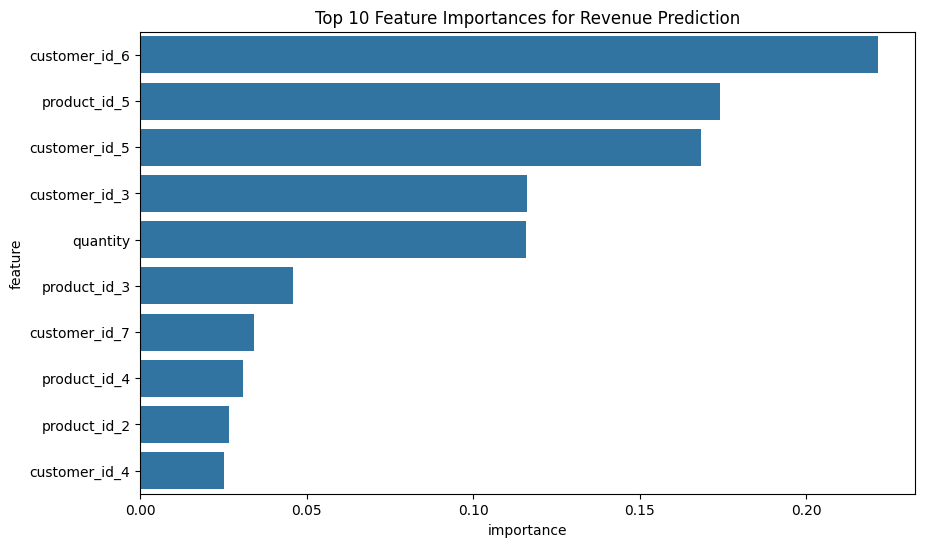

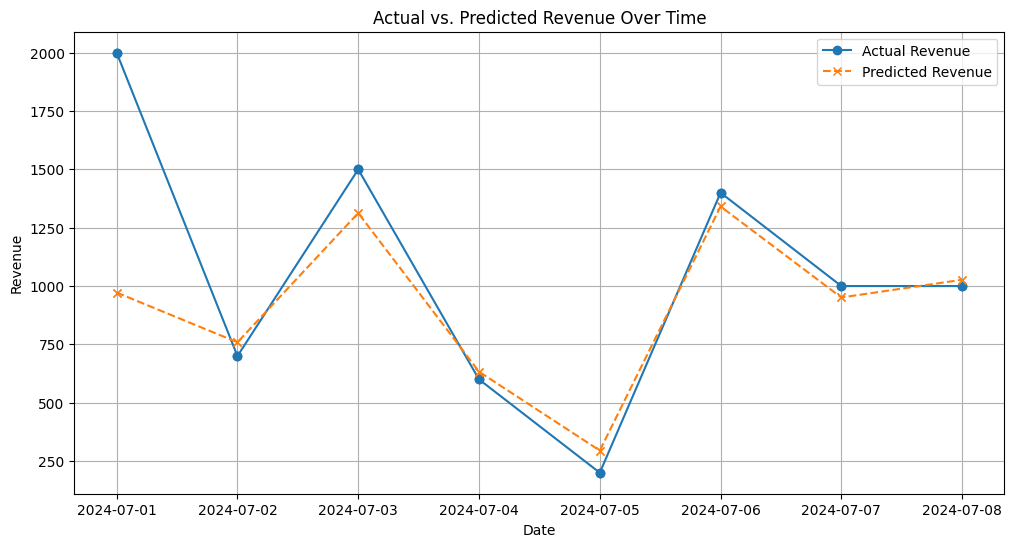


Predicted Revenue with Date:
    sale_date  total_price  predicted_revenue
0  2024-07-01      1999.98           971.9809
8  2024-07-01      1999.98           971.9809
1  2024-07-02       699.99           758.9892
9  2024-07-02       699.99           758.9892
2  2024-07-03      1499.97          1312.9720
10 2024-07-03      1499.97          1312.9720
3  2024-07-04       599.96           632.9609
11 2024-07-04       599.96           632.9609
4  2024-07-05       199.99           294.9889
12 2024-07-05       199.99           294.9889


In [50]:

# Step 1: Prepare Data for Revenue Prediction
# Features (X) and target variable (y)
X = df[['product_id', 'customer_id', 'quantity']]
y = df['total_price']

# converting categorical variables (product_id, customer_id) into binary columns
X = pd.get_dummies(X, columns=['product_id', 'customer_id'], drop_first=True)

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate Model Performance on Test Data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)

print("Model Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Step 5: Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances for Revenue Prediction')
plt.show()

# Step 6: Perform Actual Revenue Prediction on Full Dataset
df['predicted_revenue'] = rf_model.predict(X)

# Step 7: Plot Actual vs. Predicted Revenue Over Time
# Ensure the DataFrame is sorted by date
df = df.sort_values(by='sale_date')

# Plot actual vs. predicted revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df['sale_date'], df['total_price'], label='Actual Revenue', marker='o', linestyle='-')
plt.plot(df['sale_date'], df['predicted_revenue'], label='Predicted Revenue', marker='x', linestyle='--')
plt.title('Actual vs. Predicted Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Display Predicted Revenue with Date
# Select relevant columns: sale_date, actual revenue, and predicted revenue
result = df[['sale_date', 'total_price', 'predicted_revenue']].sort_values(by='sale_date')

# Display sample predictions with dates
print("\nPredicted Revenue with Date:")
print(result.head(10))


In the feature selection, the dominance of customer_id over quantity indicates that who is buying (unique customer behavior, high-value customers, and product preferences) matters more than how much they buy due to factors like varying product prices, concentrated revenue among key customers, and limited variability in purchase quantities.

2.4.  Market Basket Analysis (Association Rules)

This is used for marketing purposes in which they uncover relationships between products in transactions where multiple products are purchased together . If each transaction contains only one product like in this case, the analysis cannot produce meaningful insights.

In [48]:
# Since each transaction only has one product, association rules won't be meaningful
#The approach is demonstrated but note it requires multi-product transactions
try:
    # Create basket format (would need transaction IDs and multiple products per transaction)
    basket = df.groupby(['sale_id', 'product_name'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('sale_id')

    # Convert to binary (1 if product was purchased, 0 otherwise)
    basket = basket.applymap(lambda x: 1 if x > 0 else 0)

    # Generate frequent itemsets
    frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    print("Association Rules:")
    print(rules)
except Exception as e:
    print("Market basket analysis not meaningful with current data structure:", e)
    print("This analysis requires transactions with multiple products.")

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


<ipython-input-48-febdf404328f>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


2.5 Saving the the Random Forest Model for deployment


- The goal is to predict revenue for "individual" transactions based on "customer" and "product" features,
 which makes Random Forest the best choice.
- Random Forest can incorporate multiple features (e.g., product_id, customer_id, quantity) to make granular predictions.
- It provides insights into feature importance, helping you understand what drives revenue.

Example Use Case :
Predicting the revenue for a specific customer’s purchase to offer personalized discounts or upsell opportunities.

In [57]:
import pickle

# Save the trained model to a file
with open('random_forest_revenue_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("Model saved successfully as 'random_forest_revenue_model.pkl'")

Model saved successfully as 'random_forest_revenue_model.pkl'
